# Задача 1

In [1]:
import sys
import numpy as np
import pylab

def parse_line(fi):
    # skip header rows
    fi.readline()
    fi.readline()
    rollover = False
    for line in fi:
        fields = line.split()
        nwinners = int(fields[6])
        if nwinners == 0:
            rollover = True
            continue
        if rollover:
            rollover = False
            continue
        balls = np.array([int(v) for v in fields[:6]])
        jackpot_share = float(fields[7])
        nlow = sum(balls < 13)
        yield nlow, jackpot_share

with open('lottery-draws.txt') as fi:
    data = list(parse_line(fi))
data = np.array(data)

print(np.corrcoef(data, rowvar=0))

[[ 1.         -0.19909853]
 [-0.19909853  1.        ]]


# Задание 2

<BarContainer object of 4 artists>

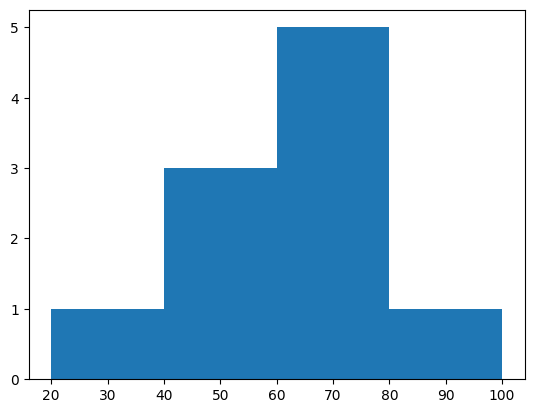

In [4]:
marks = np.array([45, 68, 56, 23, 60, 87, 75, 59, 63, 72])
bins = [20, 40, 60, 80, 100]
hist, bins = np.histogram(marks, bins)
bin_centres = (bins[:-1] + bins[1:])/2
pylab.bar(bin_centres, hist, width=20, align='center')

# Задание 3

Height (cm)  Female  Male
---------------------------
  135-140       0      1
  140-145       3      0
  145-150      26      2
  150-155      79      3
  155-160     183     37
  160-165     237     59
  165-170     262    115
  170-175     145    149
  175-180      52    174
  180-185      11    161
  185-190       2    137
  190-195       0     88
  195-200       0     50
  200-205       0     19
  205-210       0      5
---------------------------
Mean (cm):   164.1  178.8
 Std (cm):     7.4   10.8
---------------------------


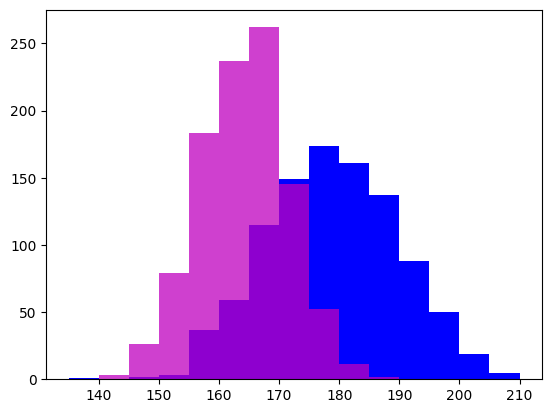

In [7]:
import numpy
heights = np.zeros((1000,), dtype={'names': ['female', 'male'],
                                   'formats': ['f8', 'f8']})
heights['female'] = np.loadtxt('ex6-3-f-female-heights.txt').flatten()
heights['male'] = np.loadtxt('ex6-3-f-male-heights.txt').flatten()
fav, fstd = heights['female'].mean(), heights['female'].std()
mav, mstd = heights['male'].mean(), heights['male'].std()
all_heights_view = heights.view((('f8', 2))).flatten()
all_heights_view.min(), all_heights_view.max()
bins = np.linspace(135, 210, 16)
mhist, _, _ = pylab.hist(heights['male'], bins, color='b')
fhist, _, _ = pylab.hist(heights['female'], bins, alpha=0.75, color='m')
print('Height (cm)  Female  Male')
print('-'*27)
for b, f, m in np.vstack((bins[:-1], fhist, mhist)).T:
    print('  {:d}-{:d}     {:3d}    {:3d}'.format(int(b), int(b)+5,
                                                   int(f), int(m)))
print('-'*27)
print('Mean (cm):   {:5.1f}  {:5.1f}'.format(fav, mav))
print(' Std (cm):   {:5.1f}  {:5.1f}'.format(fstd, mstd))
print('-'*27)